# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The aim of this report is to analyze the TMDb Movie dataset. I am interested on answering the following questions using the dataset:
- 1. Which is the proportion of the most popular genre year to year?
- 2. Which is the percentage of actor who has been at least in 20 movies?
- 3. Who are the top 10 actors based on the highest number of movies?
- 4. Which is the distribution of genres for the actor or actress who has been in the most number of movies?
- 5. Which are the top 3 movies based on highest revenue? 
- 6. How is the trend of the revenue? 
- 7. What kind of properties are associated with movies that have high revenues?


In [288]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [289]:
df_movies = pd.read_csv('data/tmdb-movies.csv')
df_movies.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


The dataset has 10866 rows and 21 columns

In [290]:
df_movies.shape

(10866, 21)

Not all movies have cast, genres, director and production_companies neither. Also there are columns with a lot of null values like homepage, tagline and keywords. But I am not interested on these columns because they aren't useful for solving the questions.

In [291]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

First observations: 
- The minimum year when was released a movie is 1960 . The most recent released movie was in 2015.
- 50% of movies had been released in 2006 or below. 50% of movies had a runtime of 99 or below.
- The budget and the revenue for the 50% of the movies is 0. It seems that there isn't data for these movies and these values cannot be used in the analysis.
- The highest budget is \$425,000,000 and the highest revenue is \$2,780,000,000. The maximum popularity of a movie is around 33

In [292]:
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


There is one duplicated row

In [293]:
sum(df_movies.duplicated())

1

### Data Cleaning 

You can find my observations and decisions for data cleaning after observing the dataset and before solving the questions:
- 1. There are some columns that are incomplete and have missing values. Moreover, I don't need them for the analysis and I decided to remove them. These are the colums names to be removed: 'imdb_id', 'overview', 'tagline', 'homepage', 'keywords', 'production_companies', 'director', 'budget_adj', 'revenue_adj'.
- 2. There is one duplicated row and I decided to remove it.
- 3. There are movies with budget and revenue equal to '0'. Instead of removing these rows, I decided to fill the 0 values with the mean of the corresponding column. I decided this option due to the size of the dataset, it isn't huge and I don't want to lose more information removing these movies.
- 4. I'm interested on 'genres' and 'cast' columns. Both columns have missing values, 23 missing values for 'genres' and 76 missing values for 'cast'. I decided to remove these rows. Also these two columns need to be transformed before being used, they are string columns composed by several genres and actors separated by '|' char. The transformations will be done for answering the related questions.

In [294]:
# drop columns which missing values and the ones that I am not interested on them
df_movies.drop(['imdb_id', 'overview', 'tagline', 'homepage', 'keywords', 'production_companies', 'director', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

There is one row duplicated and it should be removed

In [295]:
# drop duplicates
df_movies.drop_duplicates(inplace=True)


In [296]:
# Checking for zero values in the budget and revenue columns
print("Rows With Zero Values In The Budget Column:",df_movies[(df_movies['budget']==0)].shape[0])
print("Rows With Zero Values In The Revenue Column:",df_movies[(df_movies['revenue']==0)].shape[0])
# Check the mean for the budget an revenue columns
print("Budget mean: ", df_movies['budget'].mean())
print("Revenue mean: ", df_movies['revenue'].mean())

Rows With Zero Values In The Budget Column: 5696
Rows With Zero Values In The Revenue Column: 6016
Budget mean:  14624286.06433502
Revenue mean:  39826896.07685228


In [297]:
# replace zero values in budget and revenue columns with the corresponding mean value
df_movies['budget'].replace(0, df_movies['budget'].mean(), inplace=True)
df_movies['revenue'].replace(0, df_movies['revenue'].mean(), inplace=True)


In [298]:
# Checking zero values in the budget and revenue columns after cleaning
print("Rows With Zero Values In The Budget Column:",df_movies[(df_movies['budget']==0)].shape[0])
print("Rows With Zero Values In The Revenue Column:",df_movies[(df_movies['revenue']==0)].shape[0])

Rows With Zero Values In The Budget Column: 0
Rows With Zero Values In The Revenue Column: 0


In [299]:
df_movies.head(2)

,id,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015


In [300]:
#drop rows with missing values in genres and cast columns
df_movies.dropna(subset=['genres', 'cast'], how='any', inplace=True)

After data cleaning, the dataset has 10767 rows and 12 columns. Also, all columns contains values

In [301]:
df_movies.shape

(10767, 12)

In [302]:
#check the columns after the cleaning
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10767 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10767 non-null  int64  
 1   popularity      10767 non-null  float64
 2   budget          10767 non-null  float64
 3   revenue         10767 non-null  float64
 4   original_title  10767 non-null  object 
 5   cast            10767 non-null  object 
 6   runtime         10767 non-null  int64  
 7   genres          10767 non-null  object 
 8   release_date    10767 non-null  object 
 9   vote_count      10767 non-null  int64  
 10  vote_average    10767 non-null  float64
 11  release_year    10767 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 1.1+ MB


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 - Which is the proportion of the most popular genre year to year?

First, the genres of a movie need to be splitted, the column *genres* is composed by all the different genres of a movie joined with a char separator. As I decided to use also the *cast* column which is a string concatenated with a separator, I created a function in order to reuse it with all columns with the same format.

In [303]:
def get_dataframe_with_splitted_column_by_identifier(data, column_name_identifier, column_name_to_be_splitted, output_column_names,  separator='|'):
    """This method retrieves a new dataframe composed by two columns, identifier and the result of splitting a string column separated by specific char.
    Parameters:
    data: Dataframe which contains the identifier and a string column composed by several values concatenated by a specific char 
    column_name_identifier: Column name of the identifier
    column_name_to_be_splitted: Column name of the string column to be splitted
    output_column_names: An array with the column names of the output dataframe
    separator: char which is used to separate values in the column to be splitted, by default the value is '-'
    """
    # Step 0
    # Filter out rows with null values at the column to be splitted
    filtered_data = data.query('{}.notnull()'.format(column_name_to_be_splitted))
    # Step 1
    # We start with creating a new dataframe from the series with id as the index
    df_result = pd.DataFrame(filtered_data[column_name_to_be_splitted].str.split(separator).tolist(), index=filtered_data[column_name_identifier]).stack()
    # Step 2
    # We now want to get rid of the secondary index
    # To do this, we will make id as a column (it can't be an index since the values will be duplicate)
    df_result = df_result.reset_index([0, column_name_identifier])
    # Step 3
    # The final step is to set the column names as we want them
    df_result.columns = output_column_names
    return df_result

Transform the genres of each movie in rows per movie.

In [304]:
# get a datafram with each genre per movie
movie_genre = get_dataframe_with_splitted_column_by_identifier(df_movies, column_name_identifier='id', column_name_to_be_splitted='genres', output_column_names=['id', 'genre'],  separator='|')
movie_genre.head()

,id,genre
0,135397,Action
1,135397,Adventure
2,135397,Science Fiction
3,135397,Thriller
4,76341,Action


#### Calculate most popular movie genre per year
Get a dataframe with popularity, release_year and genre per movie.

In [305]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10767 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10767 non-null  int64  
 1   popularity      10767 non-null  float64
 2   budget          10767 non-null  float64
 3   revenue         10767 non-null  float64
 4   original_title  10767 non-null  object 
 5   cast            10767 non-null  object 
 6   runtime         10767 non-null  int64  
 7   genres          10767 non-null  object 
 8   release_date    10767 non-null  object 
 9   vote_count      10767 non-null  int64  
 10  vote_average    10767 non-null  float64
 11  release_year    10767 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 1.1+ MB


In [306]:
# Get a dataframe with popularity, release_year and genre per movie.
most_popular_genre_by_year = pd.merge(df_movies.iloc[:, np.r_[0:2,7,11]], movie_genre, on='id')
most_popular_genre_by_year.head(2)

,id,popularity,genres,release_year,genre
0,135397,32.985763,Action|Adventure|Science Fiction|Thriller,2015,Action
1,135397,32.985763,Action|Adventure|Science Fiction|Thriller,2015,Adventure


Calculate the total popularity: sum of popularity of all movies which belong to the same genre and release_year.

In [307]:
movie_popularity_by_genre_and_year = most_popular_genre_by_year.groupby(['release_year','genre']).sum()
movie_popularity_by_genre_and_year.sort_values(['release_year', 'popularity'], ascending=[True, False], inplace=True)
movie_popularity_by_genre_and_year.head(2)

id  popularity
release_year genre                       
1960         Drama     177022    7.361967
             Thriller   50195    4.871460

Calculate the most popular movie genre per year. The most popular movie genre is the genre with the maximun total popularity per release_year.

In [308]:
most_popular_movie_genre_per_year = movie_popularity_by_genre_and_year[movie_popularity_by_genre_and_year.popularity == movie_popularity_by_genre_and_year.groupby('release_year')['popularity'].transform('max')]
most_popular_movie_genre_per_year.reset_index(inplace=True)
most_popular_movie_genre_per_year.head(3)

,release_year,genre,id,popularity
0,1960,Drama,177022,7.361967
1,1961,Drama,254029,6.915731
2,1962,Drama,335109,8.232008


Calculate the percentage of the most popular movie genre from year to year.

In [309]:
most_popular_movie_genre_per_year_percentage = most_popular_movie_genre_per_year.genre.value_counts(normalize=True).mul(100).round(2).rename_axis('genre').reset_index(name='percentage')
most_popular_movie_genre_per_year_percentage.head()

,genre,percentage
0,Drama,69.64
1,Comedy,16.07
2,Action,7.14
3,Thriller,3.57
4,Adventure,3.57


Visualize the most popular genres.

The plot bar distribution is going to be used to visualize the answer of several research questions. This is why it was extracted to one function.

In [310]:
def plot_distribution_bar(data, labels, x, palette, title, xlabel='', ylabel='', annotation_number_of_decimals=0, annotation_suffix=''):
  sns.set_style("whitegrid")
  bar,ax = plt.subplots(figsize=(12,6))
  ax = sns.barplot(x=x, y=labels, data=data, ci=None, palette=palette,orient='h' )
  # set the title
  ax.set_title(title, fontsize=15)
  # set the label of the axis
  ax.set_xlabel (xlabel)
  ax.set_ylabel (ylabel)
  # add annotations
  for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2, '{:.{}f}{}'.format(rect.get_width(), annotation_number_of_decimals, annotation_suffix), weight='bold' )

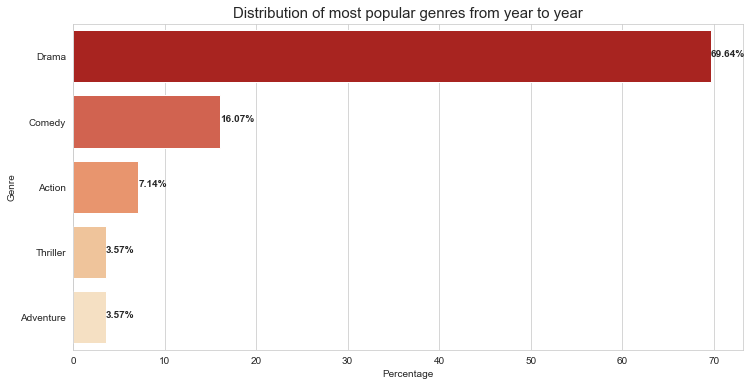

In [311]:
plot_distribution_bar(data=most_popular_movie_genre_per_year_percentage, labels=most_popular_movie_genre_per_year_percentage['genre'].tolist(), x='percentage', palette='OrRd_r', title='Distribution of most popular genres from year to year', xlabel='Percentage', ylabel='Genre', annotation_number_of_decimals=2, annotation_suffix='%')

Drama (69.64%) is the genre which has been the most popular genre from year to year, followed by Comedy (16.07%), Action (7.14%), Adventure (3.57%) and Thriller (3.57%).

### Research Question 2  - How many prolific actors and actresses are there?
Let's define that one actor is **prolific** when he/she has been in **at least 20 movies**


Get all the actors and actress per each movie.

In [312]:
movie_cast = get_dataframe_with_splitted_column_by_identifier(df_movies, column_name_identifier='id', column_name_to_be_splitted='cast', output_column_names=['id', 'actor'],  separator='|')
movie_cast.head()

,id,actor
0,135397,Chris Pratt
1,135397,Bryce Dallas Howard
2,135397,Irrfan Khan
3,135397,Vincent D'Onofrio
4,135397,Nick Robinson


Calculate number of movies per actor.

In [313]:
number_of_movies_per_actor = movie_cast.groupby('actor').agg({'id': lambda x: x.nunique()}).reset_index()
number_of_movies_per_actor.rename(columns={'id': 'total_number_of_movies'}, inplace=True)
number_of_movies_per_actor.head()

,actor,total_number_of_movies
0,Larry Mullen Jr.,2
1,Nicole MuÃ±oz,1
2,Therese Giehse,1
3,"""Weird Al"" Yankovic",1
4,50 Cent,12


Calculate how many actors went through at least 20 films.

In [314]:
number_of_movies_per_actor['prolific'] = number_of_movies_per_actor.apply(lambda x: x.total_number_of_movies >= 20, axis=1)
number_of_movies_per_actor.head(2)

,actor,total_number_of_movies,prolific
0,Larry Mullen Jr.,2,False
1,Nicole MuÃ±oz,1,False


Calculate the percentage of prolific vs non prolific actors.

In [315]:
prolific_cast_percentage = number_of_movies_per_actor.prolific.value_counts(normalize=True).mul(100).round(2).rename_axis('prolific').reset_index(name='percentage')
prolific_cast_percentage.head()

,prolific,percentage
0,False,98.01
1,True,1.99


Convert the values of prolific column to list of strings to be use as labels of the graph axis.

In [316]:
prolific_values_list = [str(x) for x in prolific_cast_percentage.prolific.tolist()]
print(prolific_values_list)

['False', 'True']


Visualize the distribution of prolific versus non-prolific authors.

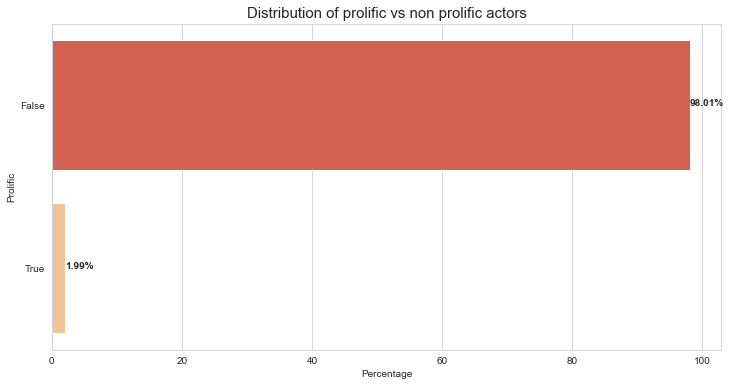

In [317]:
plot_distribution_bar(data=prolific_cast_percentage, labels=prolific_values_list, x='percentage', palette='OrRd_r', title='Distribution of prolific vs non prolific actors', xlabel='Percentage', ylabel='Prolific', annotation_number_of_decimals=2, annotation_suffix='%')

The majority (around 98%) of the actors haven't been in at least 20 movies. Only around 2% of them are prolific.

### Research Question 3  - Which are the top 10 actors based on the highest number of movies?
Let's order by descending total number of movies the list of actors and select the top 10. 

In [318]:
top_10_actor = number_of_movies_per_actor.sort_values('total_number_of_movies', ascending=False).nlargest(10, 'total_number_of_movies')
top_10_actor.head(10)

,actor,total_number_of_movies,prolific
15304,Robert De Niro,72,True
16041,Samuel L. Jackson,71,True
2503,Bruce Willis,62,True
13588,Nicolas Cage,61,True
12555,Michael Caine,53,True
15483,Robin Williams,51,True
8937,John Cusack,50,True
8978,John Goodman,49,True
13164,Morgan Freeman,49,True
17210,Susan Sarandon,48,True


Check that the number of rows is 10.

In [319]:
top_10_actor.shape

(10, 3)

Visualize the top 10 actors who have been in the most number of movies.

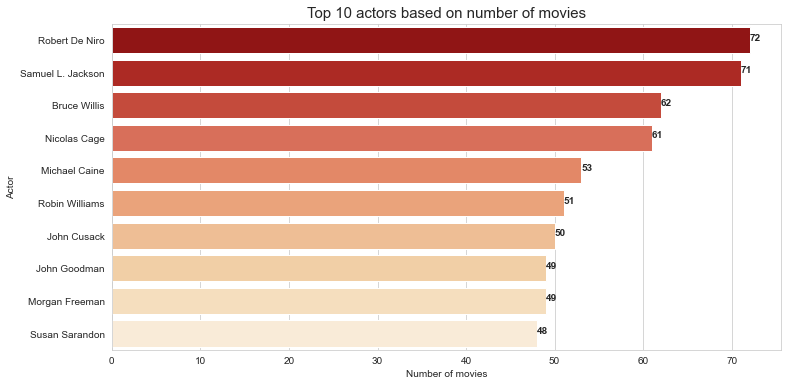

In [320]:
plot_distribution_bar(data=top_10_actor, labels=top_10_actor.actor.tolist(), x='total_number_of_movies', palette='OrRd_r', title='Top 10 actors based on number of movies', xlabel='Number of movies', ylabel='Actor')

Robert De Niro is the actor with the highest number of movies, 72. Followed very close by Samuel L. Jackson, 71. Bruce Willis has been in 62 movies and he is in third position of the ranking. Followed by Nicolas Cage with 61 movies in fourth place. Michael Caine with 53 movies in fifth position. Robin Williams is in sixth place with an amount of 51 movies. John Cusack is in seventh place with 50 movies. John Goodman appears in eighth position with 49 movies. Morgan Freeman has been in the same amount of movies than John Goodman and he is in ninth position. The last position of this top 10 ranking belong to Susan Sarandon with 48 movies. She is the first actress found in the ranking. We can say than 90% are males and only 10% are women.

### Research Question 4 - Which is the distribution of the genres for the actor with the highest number of movies?

Get the actor with the highest number of movies.

In [321]:
top_one_actor = top_10_actor.nlargest(1, 'total_number_of_movies').actor.tolist()
print(top_one_actor)

['Robert De Niro']


Get the movies of the actor who has the highest number of movies.

In [322]:
movies_of_most_prolific_actor = movie_cast.query('actor == ({})'.format(top_one_actor))
movies_of_most_prolific_actor.head(2)

,id,actor
255,257211,Robert De Niro
267,274479,Robert De Niro


Get the genres for each movie of the actor with the highest number of movies.

In [323]:
movies_genres_of_most_prolific_actor = pd.merge(movies_of_most_prolific_actor, movie_genre, on='id')
movies_genres_of_most_prolific_actor.head(2)

,id,actor,genre
0,257211,Robert De Niro,Comedy
1,274479,Robert De Niro,Comedy


Calculate the number of movies by genre for that actor.

In [324]:
number_of_movies_of_most_prolific_actor_by_genre = movies_genres_of_most_prolific_actor.groupby(['actor', 'genre']).agg({'id': 'count'}).reset_index()
number_of_movies_of_most_prolific_actor_by_genre.rename(columns={'id': 'number_of_movies'}, inplace=True)
number_of_movies_of_most_prolific_actor_by_genre.sort_values('number_of_movies', ascending=False, inplace=True)
number_of_movies_of_most_prolific_actor_by_genre.head(2)

,actor,genre,number_of_movies
5,Robert De Niro,Drama,42
3,Robert De Niro,Comedy,27


Visualize the number of movies per genre where Rober De Niro worked.

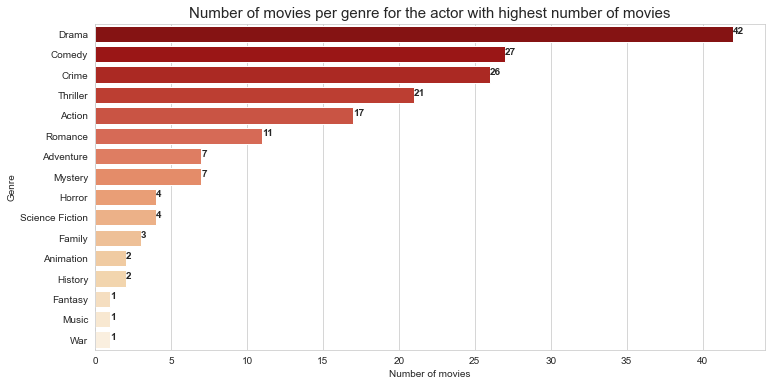

In [325]:
plot_distribution_bar(data=number_of_movies_of_most_prolific_actor_by_genre, labels=number_of_movies_of_most_prolific_actor_by_genre.genre.tolist(), x='number_of_movies', palette='OrRd_r', title='Number of movies per genre for the actor with highest number of movies', xlabel='Number of movies', ylabel='Genre')

The most common genre which Robert De Niro has been acted is Drama with 42 movies, followed by Comedy and Crime with 26 movies each one.

Visualize the distribution of movie genres where Rober De Niro has been.

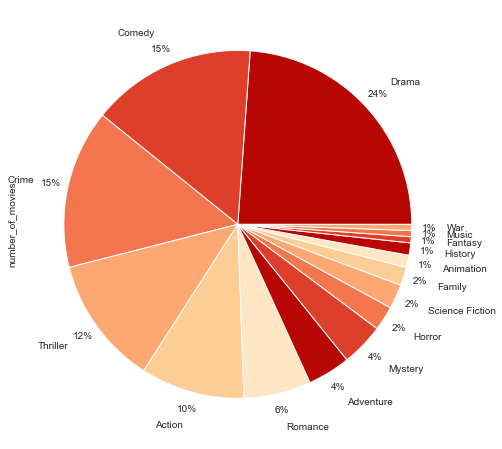

In [326]:
number_of_movies_of_most_prolific_actor_by_genre.plot(kind='pie', y='number_of_movies', labels = number_of_movies_of_most_prolific_actor_by_genre['genre'].tolist(), figsize=(12,8), legend=False, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2, colors=sns.color_palette('OrRd_r'))
plt.show();

24% of movies where Robert De Niro has been acted belong to Drama genre. Followed by Comedy (15%), Crime (15%), Thriller (12%) and Action (10%).

I'm going to use similar information for exploring the last three questions. This is why I'm going to use the same dataframe with some modifications, but it can be reuse it. 
The properties which can be associated to revenues are budget, popularity, runtime and vote_average. In the following cell, we can check the indexes of the columns which I'm interested on. Also, I'm interested on having the original_title and the release_year to answer which is the movie with highest revenue and check the trend of revenues over years.

In [327]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10767 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10767 non-null  int64  
 1   popularity      10767 non-null  float64
 2   budget          10767 non-null  float64
 3   revenue         10767 non-null  float64
 4   original_title  10767 non-null  object 
 5   cast            10767 non-null  object 
 6   runtime         10767 non-null  int64  
 7   genres          10767 non-null  object 
 8   release_date    10767 non-null  object 
 9   vote_count      10767 non-null  int64  
 10  vote_average    10767 non-null  float64
 11  release_year    10767 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 1.1+ MB


Get the dataframe with the columns which are needed for the analysis.

In [328]:
sorted_movies_by_highest_revenue = df_movies.iloc[:,np.r_[1:5,6,10:12]].sort_values('revenue',ascending=False)
sorted_movies_by_highest_revenue.head(5)


,popularity,budget,revenue,original_title,runtime,vote_average,release_year
1386,9.432768,237000000.0,2.781506e+09,Avatar,162,7.1,2009
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136,7.5,2015
5231,4.355219,200000000.0,1.845034e+09,Titanic,194,7.3,1997
4361,7.637767,220000000.0,1.519558e+09,The Avengers,143,7.3,2012
0,32.985763,150000000.0,1.513529e+09,Jurassic World,124,6.5,2015


### Research Question 5 - Which are the top 3 movies based on highest revenue?

In [329]:
# get the top 3 movies with highest revenue
top_3_movies = sorted_movies_by_highest_revenue.nlargest(3, 'revenue')
top_3_movies.head()

,popularity,budget,revenue,original_title,runtime,vote_average,release_year
1386,9.432768,237000000.0,2.781506e+09,Avatar,162,7.1,2009
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136,7.5,2015
5231,4.355219,200000000.0,1.845034e+09,Titanic,194,7.3,1997


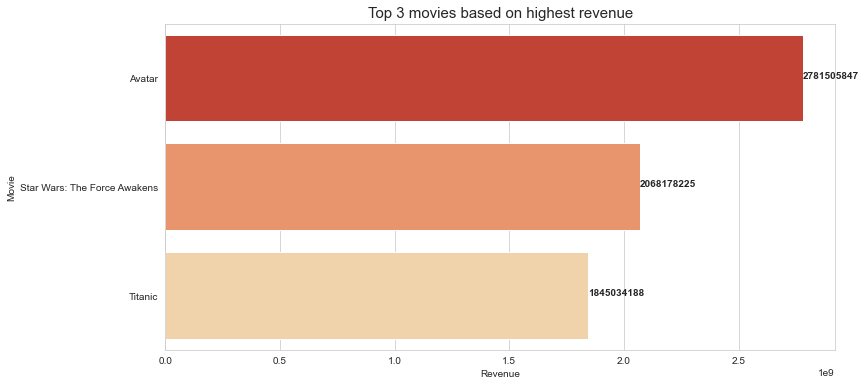

In [330]:
plot_distribution_bar(data=top_3_movies, labels=top_3_movies.original_title.tolist(), x='revenue', palette='OrRd_r', title='Top 3 movies based on highest revenue', xlabel='Revenue', ylabel='Movie')

The movie with the highest revenue is Avatar. It had \$2.78 billions of revenue. Star Wars: The Force Awakens is in second position with around \$2 billion of revenue. Titanic is in third position with a revenue of \$1.84 billion.

** Note: The currency is not specified in the dataset. However, checking the raw data in Kaggle you can find that the currency is $.

### Research Question 6 - How is the trend of the revenue?

For analyzing the trendiness of the revenue is better to calculate a 5-years moving average

In [331]:
#calculate the average of revenue from year to year
movies_with_moving_average = sorted_movies_by_highest_revenue.iloc[:,np.r_[2,6]].groupby('release_year').mean().reset_index()
#rename the column name of the average revenue
movies_with_moving_average.rename(columns={'revenue': 'avg_revenue'}, inplace=True)
#sort dataframe based on ascending release_year
movies_with_moving_average.sort_values('release_year', ascending=True, inplace=True)
#calculate the five years moving average 
movies_with_moving_average['five_years_moving_average'] = movies_with_moving_average['avg_revenue'].rolling(window=5).mean()
movies_with_moving_average.head()

,release_year,avg_revenue,five_years_moving_average
0,1960,3.564617e+07,NaN
1,1961,3.787371e+07,NaN
2,1962,3.536245e+07,NaN
3,1963,3.713915e+07,NaN
4,1964,4.035943e+07,3.727618e+07


#### Visualize the trendiness of the revenue over years

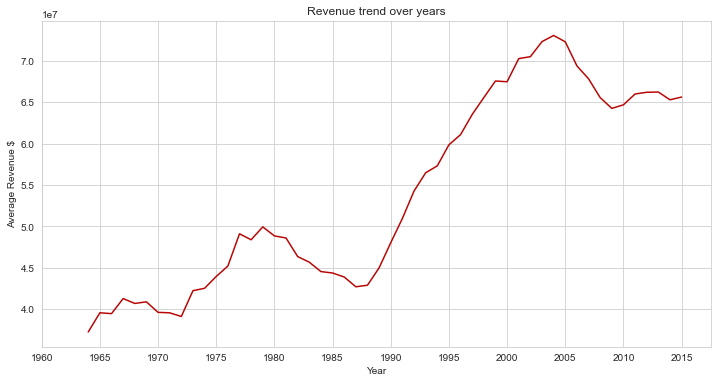

In [332]:
movies_with_moving_average_plt = movies_with_moving_average.plot(x='release_year',y=['five_years_moving_average'], xticks = np.arange(1960,2016,5), color=sns.color_palette('OrRd_r'), title='Revenue trend over years', figsize=(12,6), legend=False)
movies_with_moving_average_plt.set_xlabel('Year')
movies_with_moving_average_plt.set_ylabel('Average Revenue $')
plt.show();

The trend of revenues was increasing from over the years until its maximum peak around 2004. After 2004 the trendiness of revenues was decreasing, with small recovery around 2011 but after that the trendiness was descendant too.

### Research Question 7 - What kind of properties are associated with movies that have high revenues?

#### Visualize the correlation between revenue and the choosen properties 

In [333]:
# drop title and release_year before calculating the correlation coefficient
sorted_movies_by_highest_revenue.drop(['original_title','release_year'], axis=1, inplace=True)

In [334]:
corr = sorted_movies_by_highest_revenue.corr()
corr.head()

,popularity,budget,revenue,runtime,vote_average
popularity,1.000000,0.515518,0.635241,0.136811,0.215569
budget,0.515518,1.000000,0.705363,0.171335,0.077196
revenue,0.635241,0.705363,1.000000,0.142175,0.155055
runtime,0.136811,0.171335,0.142175,1.000000,0.171845
vote_average,0.215569,0.077196,0.155055,0.171845,1.000000


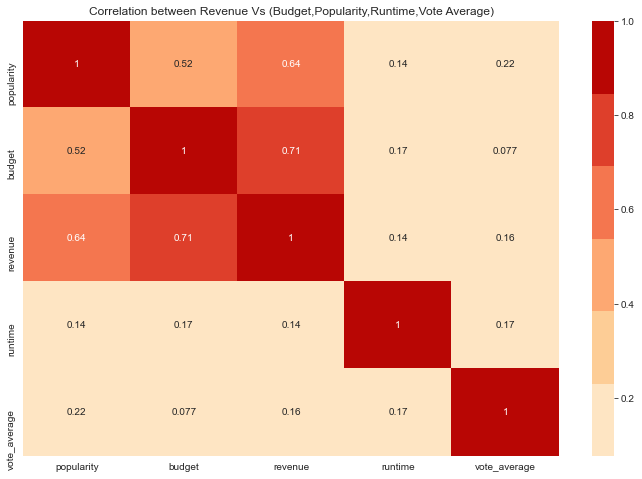

In [335]:
plt.figure(figsize=(12, 8))
ax = plt.axes()
revenue_heatmap_plot = sns.heatmap(data=corr, cmap=sns.color_palette('OrRd'),annot=True)
ax.set_title("Correlation between Revenue Vs (Budget,Popularity,Runtime,Vote Average)")
plt.show();

#### Revenue vs Budget
The revenue seems to be correlated to the budget. When the budget is higher then the revenues seems to have better numbers. The correlation is 0.71.
#### Revenue vs Popularity
The revenue increases with popularity. If the popularity of movie is high then the revenue seems to be high also. The correlation between both is the 0.64.
#### Revenue vs Runtime
It doesn't exist correlation between these two variables. The correlation coefficient is 0.14, the lowest value of the selected properties.
#### Revenue vs Vote Average
These two variables aren't correlated. The correlation coefficient is also low, 0.15

<a id='conclusions'></a>
## Conclusions

- 1. Drama (69.64%) is the genre which has been the most popular genre from year to year, followed by Comedy (16.07%), Action (7.14%), Adventure (3.57%) and Thriller (3.57%). 
- 2. Only around 2% of actors have been acted in at least 20 movies.
- 3. Robert De Niro is the actor with the highest number of movies (72), followed very close by Samuel L. Jackson (71). For finding an actress in the top 10 list of actors, you have to go to the last position where Susan Sarandon with 48 movies. There is only one actress from nine actors in the top 10 list.
- 4. The most common genre developed by Robert De Niro is Drama (24%). Followed by Comedy (15%), Crime (15%), Thriller (12%) and Action (10%).
- 5. The movie with the highest revenue is Avatar (around \$2.78 billion), followed by Star Wars: The Force Awakness (\$2 billion) and Titanic in third position with \$1.78 billion of revenue.
- 6. The trendiness of the revenues was increasing from 1960 until around 2004, where it was the maximum peak. The trendiness of revenues was decreasing since 2004 until 2011. It appeared a small recovery in 2011 but after that the revenues continued decreasing.
- 7. The most correlated movie properties to the revenue are the budget with a 0.71 correlation coefficient and popularity with the correlation of 0.64. When a movie is more popular and have more investment, it's very probable that the revenue of that movie will be higher.

## Limitations 
There are some limitations in the dataset:
- 1. The statistics used here are descriptive. This means that hypotheses and controlled experiments were not created.
- 2. Due to missing values for budget and revenue columns, I decided to fill these values using the mean of the corresponding column. However, this approach can add variance and bias.
- 3. Also, I decided to remove movies without genres and cast because these two columns were needed to answer the questions.
